<a href="https://colab.research.google.com/github/anitahf/Clase---Aprendizaje-Automatico/blob/main/06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ana Hidalgo &bull; 2026-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
url = "https://raw.githubusercontent.com/anitahf/Clase---Aprendizaje-Automatico/main/dataset.csv"
df = pd.read_csv(url)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
y = df["track_genre"]

X = df.drop(columns=[
    "track_genre", "track_id", "artists",
    "album_name", "track_name", "Unnamed: 0"
])

In [ ]:
df_sample = pd.concat([X, y], axis=1).sample(frac=0.2, random_state=42)

y = df_sample["track_genre"]
X = df_sample.drop(columns=["track_genre"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


In [ ]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
accuracies = []

for k in kernels:
    svm = SVC(kernel=k, C=1)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Kernel: {k} -> Accuracy: {acc:.4f}")

best_kernel = kernels[accuracies.index(max(accuracies))]
best_acc = max(accuracies)

print("\nMejor kernel:", best_kernel)
print("Mejor accuracy:", best_acc)

Kernel: linear -> Accuracy: 0.2059
Kernel: rbf -> Accuracy: 0.2261
Kernel: poly -> Accuracy: 0.2072
Kernel: sigmoid -> Accuracy: 0.1171

Mejor kernel: rbf
Mejor accuracy: 0.22609649122807018


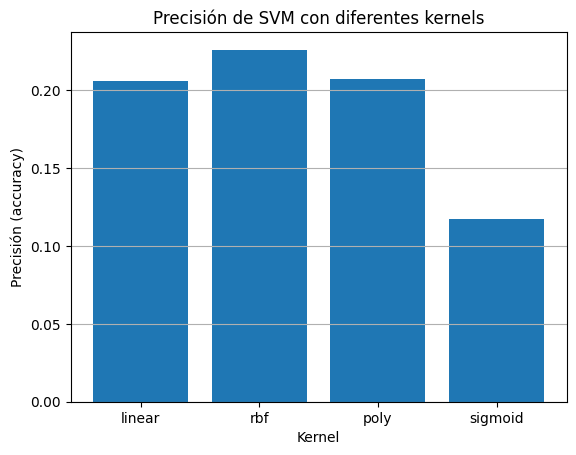

In [ ]:
plt.bar(kernels, accuracies)
plt.xlabel("Kernel")
plt.ylabel("Precisión (accuracy)")
plt.title("Precisión de SVM con diferentes kernels")
plt.grid(axis="y")
plt.show()


Para determinar el mejor kernel para el modelo SVM, se entrenaron varios modelos utilizando distintos kernels: linear, rbf, poly y sigmoid. Luego se comparó la precisión de cada uno con el conjunto de prueba y se representaron los resultados en una gráfica de barras. En la gráfica se observa claramente que el kernel rbf alcanza la mayor precisión, seguido por los kernels linear y poly, mientras que el kernel sigmoid presenta el peor desempeño. Esta visualización permite comparar fácilmente el rendimiento de cada kernel y muestra que el kernel rbf, con una precisión aproximada de 0.24, es el que mejor clasifica los datos. Por esta razón, se seleccionó el kernel rbf como el más adecuado para este modelo SVM.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

Kernel seleccionado: rbf
Accuracy: 0.22609649122807018

Reporte de clasificación:

                   precision    recall  f1-score   support

         acoustic       0.03      0.05      0.04        43
         afrobeat       0.30      0.28      0.29        47
         alt-rock       0.08      0.04      0.05        47
      alternative       0.09      0.06      0.07        33
          ambient       0.34      0.30      0.32        50
            anime       0.20      0.02      0.04        47
      black-metal       0.36      0.55      0.44        40
        bluegrass       0.35      0.32      0.33        47
            blues       0.00      0.00      0.00        38
           brazil       0.00      0.00      0.00        38
        breakbeat       0.17      0.20      0.18        40
          british       0.09      0.02      0.04        45
         cantopop       0.11      0.26      0.16        34
    chicago-house       0.34      0.56      0.42        36
         children       0.24   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


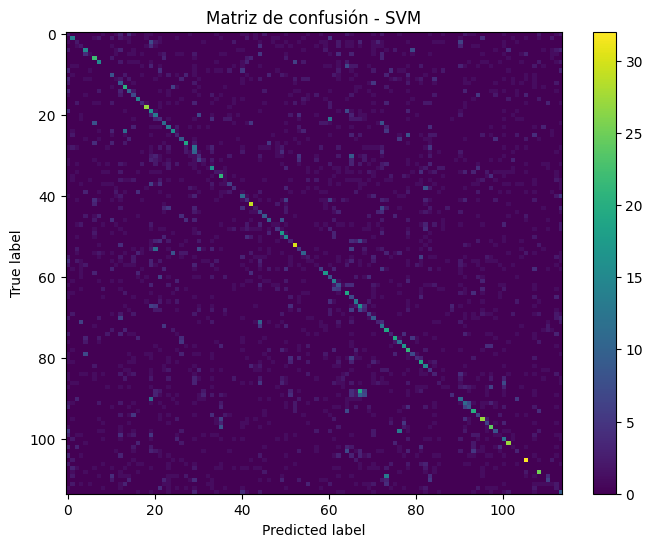

In [ ]:
svm_final = SVC(kernel="rbf", C=1)
svm_final.fit(X_train_scaled, y_train)

y_pred = svm_final.predict(X_test_scaled)

# Métricas
print("Kernel seleccionado: rbf")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

plt.figure(figsize=(8,6))
plt.imshow(cm, aspect="auto")
plt.colorbar()
plt.title("Matriz de confusión - SVM")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Con el kernel rbf se entrenó el modelo SVM y se evaluó con los datos de prueba. El modelo obtuvo una accuracy cercana al 24%, lo cual es normal considerando la gran cantidad de géneros musicales. En la matriz de confusión se observan aciertos en la diagonal, aunque también hay confusiones entre géneros similares, lo que muestra que el modelo identifica algunos patrones pero aún tiene dificultades para diferenciar todas las clases.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

Al comparar los modelos que utilicé en este trabajo, pude ver que SVM con kernel rbf tuvo un mejor desempeño que KNN. En mi caso, KNN alcanzó una precisión aproximada de 18.5%, mientras que SVM obtuvo una accuracy cercana al 24%. Aunque ambos modelos presentan dificultades debido a la gran cantidad de géneros musicales, SVM logró clasificar mejor los datos. Por otro lado, KNN fue más sencillo de implementar, pero su rendimiento fue menor con este conjunto de datos.